In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/covid_19_india.csv')

In [ ]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:

df.columns=df.columns.str.lower()

In [ ]:
df.rename(columns={'time':'last_update',
                    'state/unionterritory':'state/ut',
                   'confirmed':'total confirmed'
                      },inplace=True)

In [ ]:
df.head()

,sno,date,last_update,state/ut,confirmedindiannational,confirmedforeignnational,cured,deaths,total confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df.corr()

,sno,cured,deaths,total confirmed
sno,1.000000,0.408482,0.301742,0.403012
cured,0.408482,1.000000,0.917529,0.997751
deaths,0.301742,0.917529,1.000000,0.918346
total confirmed,0.403012,0.997751,0.918346,1.000000


In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:

df['infected_days']=(df['date']-df['date'].min()).dt.days
df



,sno,date,last_update,state/ut,confirmedindiannational,confirmedforeignnational,cured,deaths,total confirmed,infected_days
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,0
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353,559
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660,559
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462,559
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812,559


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   sno                       18110 non-null  int64         
 1   date                      18110 non-null  datetime64[ns]
 2   last_update               18110 non-null  object        
 3   state/ut                  18110 non-null  object        
 4   confirmedindiannational   18110 non-null  object        
 5   confirmedforeignnational  18110 non-null  object        
 6   cured                     18110 non-null  int64         
 7   deaths                    18110 non-null  int64         
 8   total confirmed           18110 non-null  int64         
 9   infected_days             18110 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 1.4+ MB


In [ ]:
df.corr()

,sno,cured,deaths,total confirmed,infected_days
sno,1.000000,0.408482,0.301742,0.403012,0.999870
cured,0.408482,1.000000,0.917529,0.997751,0.407147
deaths,0.301742,0.917529,1.000000,0.918346,0.300848
total confirmed,0.403012,0.997751,0.918346,1.000000,0.401728
infected_days,0.999870,0.407147,0.300848,0.401728,1.000000


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 <a list of 46 Text major ticklabel objects>)

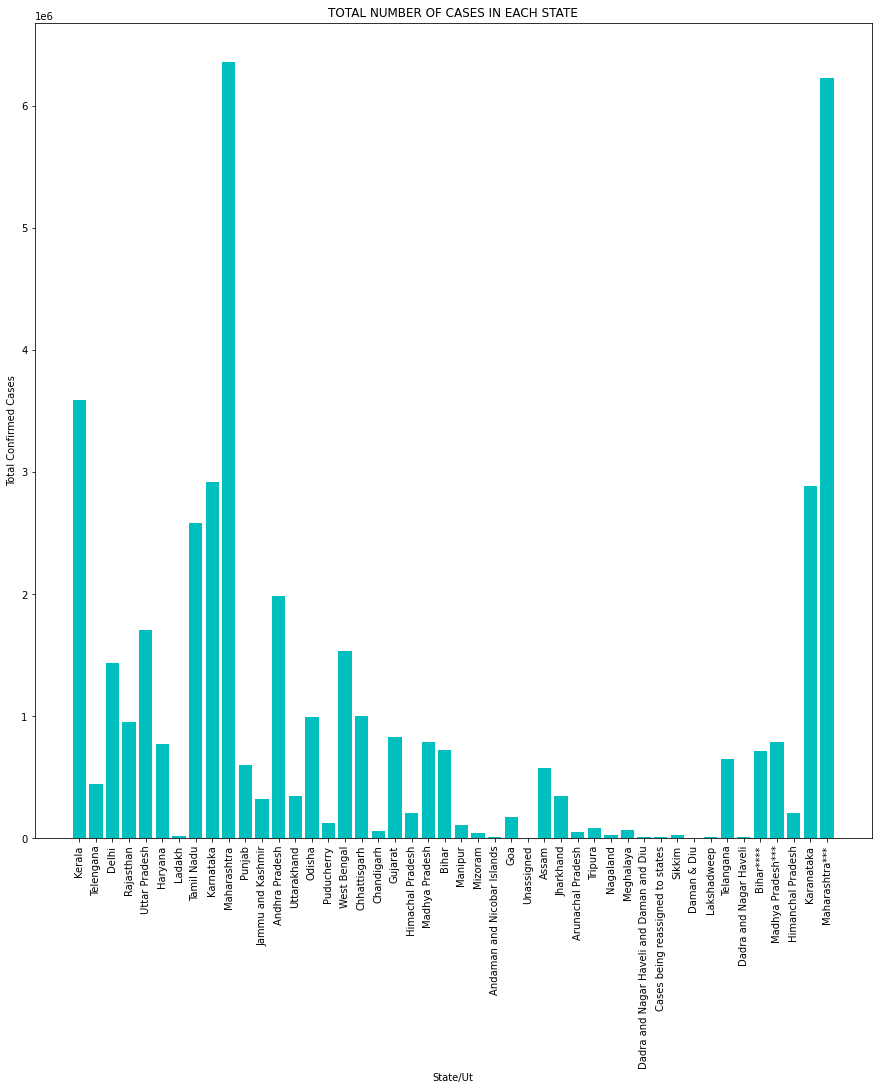

In [ ]:
plt.figure(figsize=(15,15))
plt.bar(df["state/ut"],df["total confirmed"],color='c')
plt.ylabel('Total Confirmed Cases')
plt.title('TOTAL NUMBER OF CASES IN EACH STATE')
plt.xlabel('State/Ut')
plt.xticks(rotation=90)



In [ ]:
 from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["state/ut"] = le.fit_transform(df["state/ut"])
df["last_update"] = le.fit_transform(df["last_update"])
df


,sno,date,last_update,state/ut,confirmedindiannational,confirmedforeignnational,cured,deaths,total confirmed,infected_days
0,1,2020-01-30,2,22,1,0,0,0,1,0
1,2,2020-01-31,2,22,1,0,0,0,1,1
2,3,2020-02-01,2,22,2,0,0,0,2,2
3,4,2020-02-02,2,22,3,0,0,0,3,3
4,5,2020-02-03,2,22,3,0,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,4,39,-,-,638410,3831,650353,559
18106,18107,2021-08-11,4,41,-,-,77811,773,80660,559
18107,18108,2021-08-11,4,44,-,-,334650,7368,342462,559
18108,18109,2021-08-11,4,43,-,-,1685492,22775,1708812,559


In [ ]:
df=df.drop(['sno','confirmedindiannational','confirmedforeignnational'],axis=1)

In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
x=df['total confirmed'].values.reshape(-1,1)
y=df['deaths'].values.reshape(-1,1)


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)  

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=model.predict(x_test)

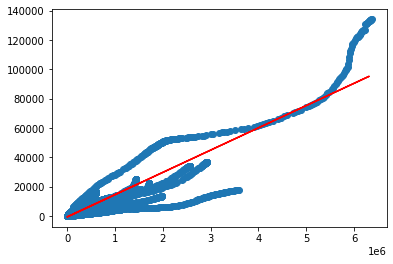

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred,color="red")
plt.show()

In [ ]:
df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,41196,23208.197765
1,79,-368.006945
2,356,-71.840255
3,69615,70296.332710
4,10076,11970.444637
...,...,...
3617,1094,2756.175825
3618,767,812.909331
3619,4171,2908.032429
3620,48,-499.061274


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb913585650>,
      dtype=object)

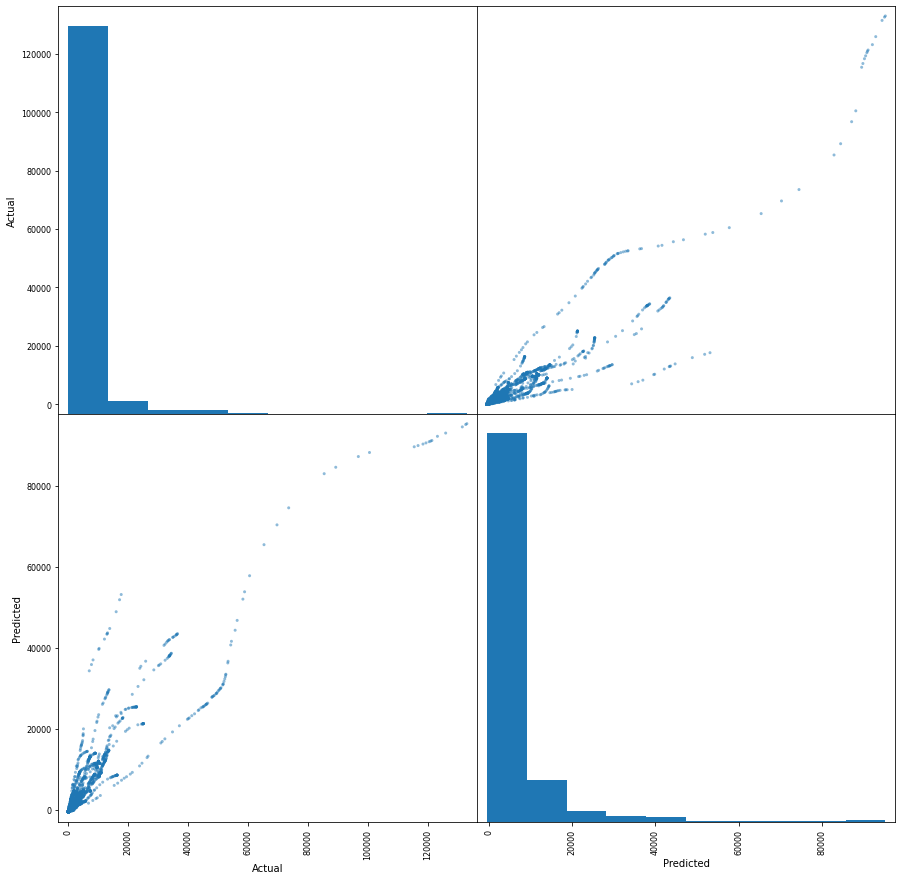

In [ ]:
pd.plotting.scatter_matrix(df,figsize=(15,15))

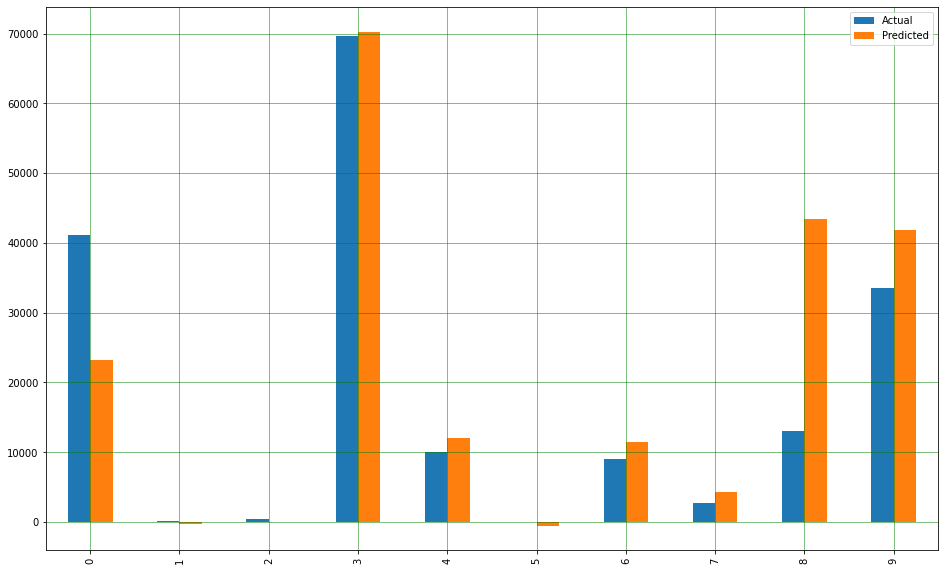

In [ ]:
df=df.head(10)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
r2 = metrics.r2_score(y_test, y_pred)
print('R^2:' , r2)

R^2: 0.8518215636739426
